<a href="https://colab.research.google.com/github/mammaraltaf/mammaraltaf/blob/main/PreProcessing_EDA_Adult_dataser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [5]:
labels =['Age', 'Workclass', 'fnlwgt' , 'Education', 'Education-num', 'Marital-status', 'Occupation', 'Relationship', 'Race' , 'Sex', 'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country', 'Class']
adult_df = pd.read_csv("/content/drive/MyDrive/adult.data", names=labels)

In [6]:
adult_df

,Age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
adult_df.shape

(32561, 15)

In [9]:
adult_df.describe()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
adult_df.nunique()

Age                  73
Workclass             9
fnlwgt            21648
Education            16
Education-num        16
Marital-status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital-gain        119
Capital-loss         92
Hours-per-week       94
Native-country       42
Class                 2
dtype: int64

In [11]:
adult_df['Workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [12]:
adult_df.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Class             0
dtype: int64

In [13]:
correlation = adult_df.corr()

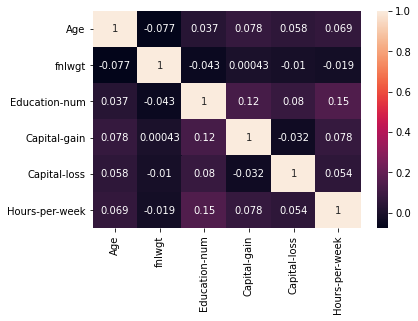

In [14]:
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

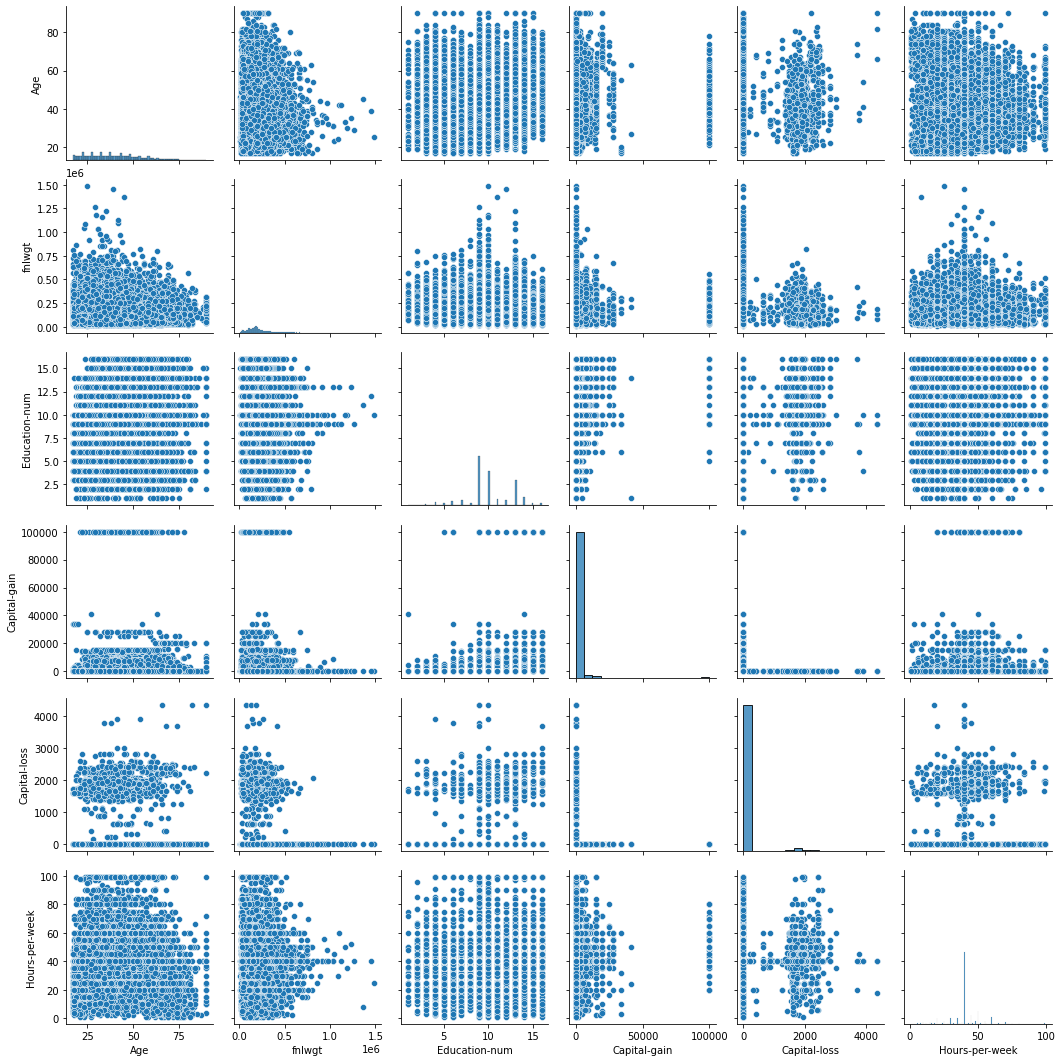

In [17]:
sns.pairplot(adult_df)

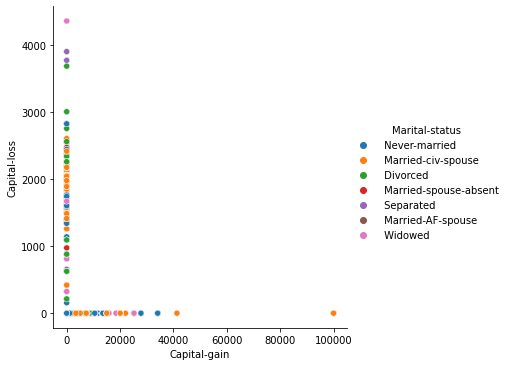

In [20]:
sns.relplot(x = "Capital-gain", y = "Capital-loss", hue='Marital-status', data= adult_df)

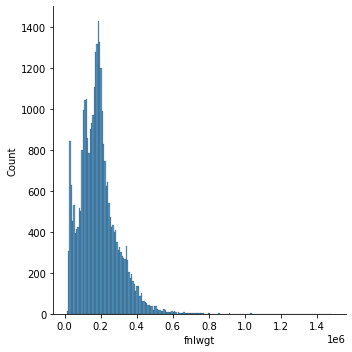

In [15]:
sns.displot(adult_df['fnlwgt'])

**Detection & OutLiers removal**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


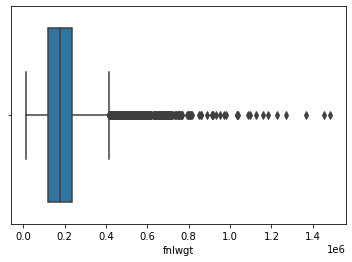

In [16]:
sns.boxplot(adult_df['fnlwgt'])

In [22]:
Q1 = adult_df['fnlwgt'].quantile(0.25)
Q3 = adult_df['fnlwgt'].quantile(0.75)
Q1 , Q3

(117827.0, 237051.0)

In [23]:
IQR= Q3-Q1
IQR

119224.0

In [24]:
low_lim = Q1-1.5*IQR
upp_lim = Q3+1.5*IQR
low_lim , upp_lim

(-61009.0, 415887.0)

In [26]:
(adult_df['fnlwgt'] < low_lim).sum()

0

In [27]:
(adult_df['fnlwgt'] > upp_lim).sum()

992

In [29]:
adult_df= adult_df[(adult_df['fnlwgt'] > low_lim)|(adult_df['fnlwgt'] < upp_lim)]

In [30]:
adult_df['fnlwgt']= adult_df['fnlwgt'].replace( adult_df['fnlwgt'].median())
adult_df['fnlwgt']

0         77516
1         83311
2        215646
3        234721
4        338409
          ...  
32556    257302
32557    154374
32558    151910
32559    201490
32560    287927
Name: fnlwgt, Length: 32561, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


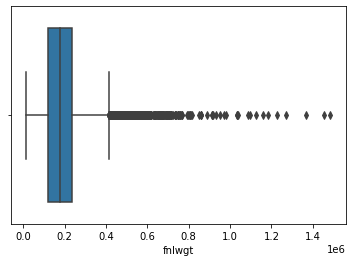

In [31]:
sns.boxplot(adult_df['fnlwgt'])